Room Type Distribution:
 room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Top 10 Neighborhoods with Most Listings:
 neighbourhood_cleansed
Embajadores        2318
Universidad        1869
Palacio            1506
Sol                1125
Justicia            951
Cortes              880
Trafalgar           371
Palos de Moguer     337
Goya                296
Argüelles           281
Name: count, dtype: int64

Single Listing Hosts: 6606
Multiple Listing Hosts: 10282

Average Price Difference (English - Spanish): 0.57

Effect of Features on Price:
accommodates: 20.81
bedrooms: 76.64
beds: -19.00
review_scores_rating: 0.42


<ipython-input-1-3d42ccbee3c0>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')


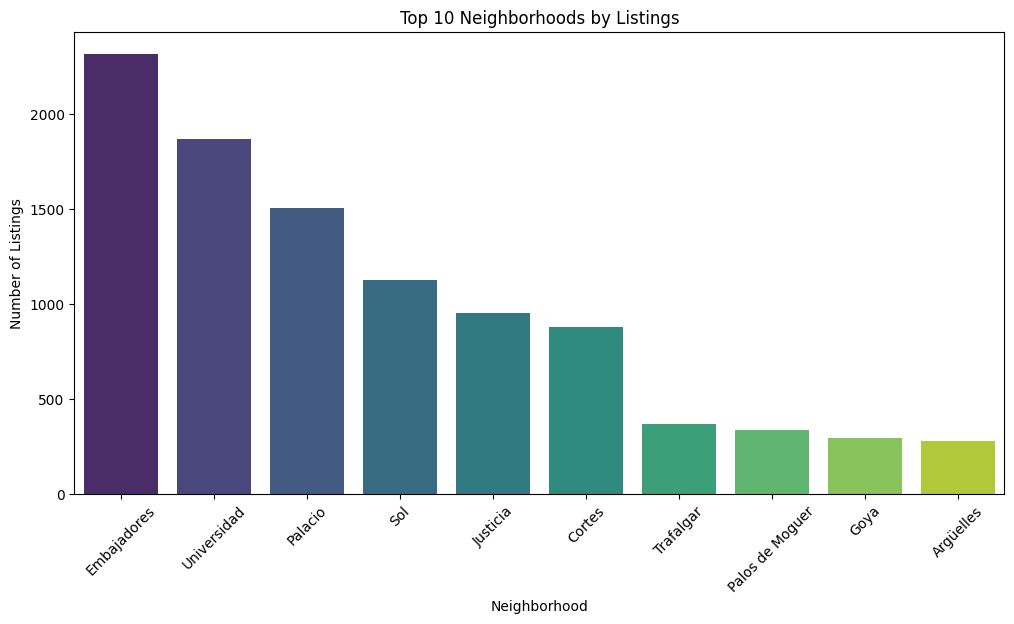

<ipython-input-1-3d42ccbee3c0>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')


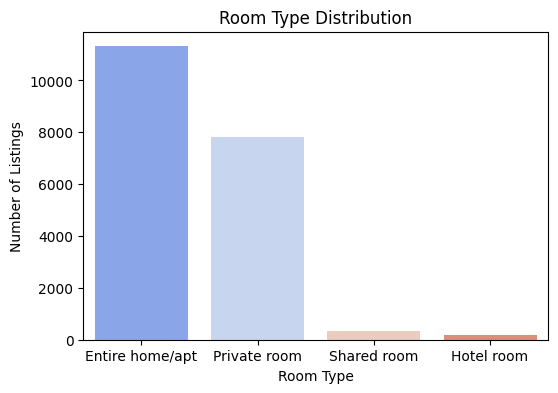

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/listings_detailed.csv"
df = pd.read_csv(file_path)

# Preprocess price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# 1) Airbnb's original idea - Room type distribution
room_type_counts = df['room_type'].value_counts()
print("Room Type Distribution:\n", room_type_counts)

# 2) Neighborhood distribution - Listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print("\nTop 10 Neighborhoods with Most Listings:\n", neighborhood_counts.head(10))

# 3) Properties owned by single vs. multiple hosts
single_listing_hosts = df[df['host_total_listings_count'] == 1].shape[0]
multi_listing_hosts = df[df['host_total_listings_count'] > 1].shape[0]
print("\nSingle Listing Hosts:", single_listing_hosts)
print("Multiple Listing Hosts:", multi_listing_hosts)

# 4) Price differences for tourists vs. locals
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)  # Detect English text presence
english_prices = df[df['is_english'] == True]['price']
spanish_prices = df[df['is_english'] == False]['price']
price_diff = english_prices.mean() - spanish_prices.mean()
print("\nAverage Price Difference (English - Spanish):", round(price_diff, 2))

# 5) Effect of different factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
df_filtered = df.dropna(subset=features + ['price'])

X = df_filtered[features]
y = df_filtered['price']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coefficients = dict(zip(features, model.coef_))

print("\nEffect of Features on Price:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.2f}")

# Visualizing Neighborhood Listings
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods by Listings")
plt.show()

# Visualizing Room Type Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Room Type Distribution")
plt.show()

Room Type Distribution:
 room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Top 10 Neighborhoods with Most Listings:
 neighbourhood_cleansed
Embajadores        2318
Universidad        1869
Palacio            1506
Sol                1125
Justicia            951
Cortes              880
Trafalgar           371
Palos de Moguer     337
Goya                296
Argüelles           281
Name: count, dtype: int64

Single Listing Hosts: 6606
Multiple Listing Hosts: 10282

Average Price Difference (English - Spanish): 0.57

Effect of Features on Price:
accommodates: 20.81
bedrooms: 76.64
beds: -19.00
review_scores_rating: 0.42


<ipython-input-2-2514fa370e84>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')


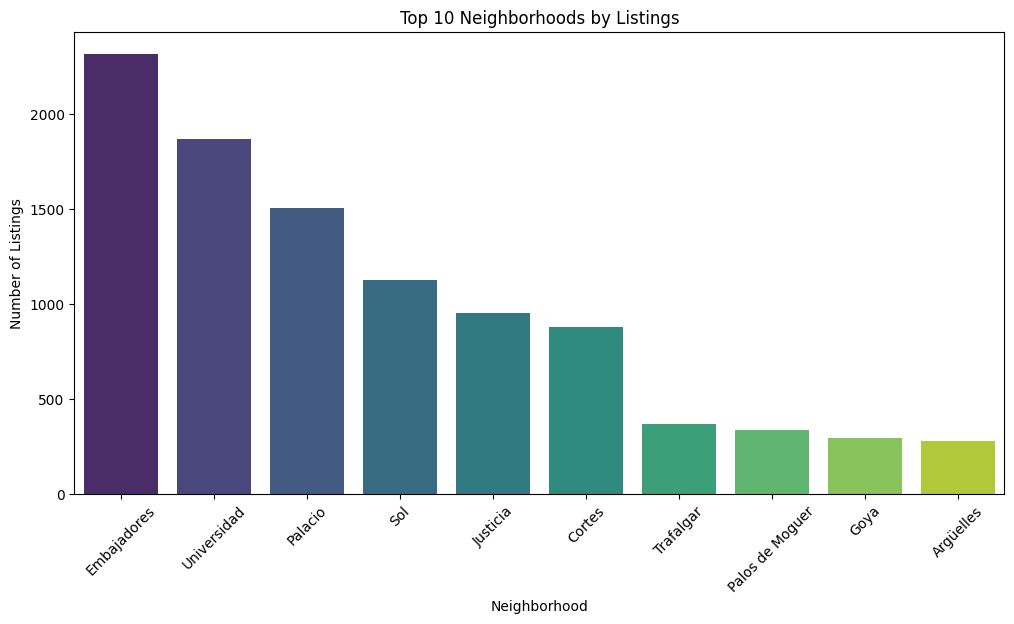

<ipython-input-2-2514fa370e84>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')


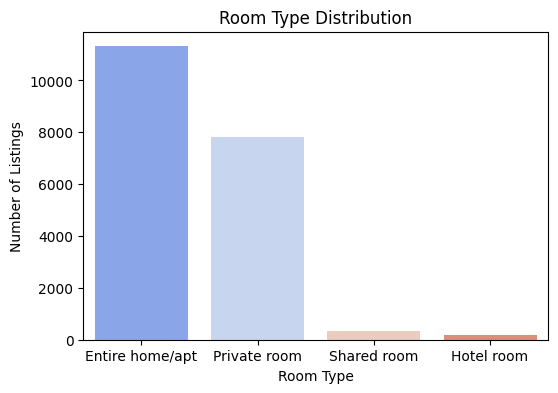

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/listings_detailed.csv"
df = pd.read_csv(file_path)

# Preprocess price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Descriptive Question 1: Airbnb's original idea - Room type distribution
room_type_counts = df['room_type'].value_counts()
print("Room Type Distribution:\n", room_type_counts)

# Descriptive Question 2: Neighborhood distribution - Listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print("\nTop 10 Neighborhoods with Most Listings:\n", neighborhood_counts.head(10))

# Descriptive Question 3: Properties owned by single vs. multiple hosts
single_listing_hosts = df[df['host_total_listings_count'] == 1].shape[0]
multi_listing_hosts = df[df['host_total_listings_count'] > 1].shape[0]
print("\nSingle Listing Hosts:", single_listing_hosts)
print("Multiple Listing Hosts:", multi_listing_hosts)

# Descriptive Question 4: Price differences for tourists vs. locals
df['is_english'] = df['description'].str.contains(r'[a-zA-Z]', na=False)  # Detect English text presence
english_prices = df[df['is_english'] == True]['price']
spanish_prices = df[df['is_english'] == False]['price']
price_diff = english_prices.mean() - spanish_prices.mean()
print("\nAverage Price Difference (English - Spanish):", round(price_diff, 2))

# Regression Question: Effect of different factors on price
features = ['accommodates', 'bedrooms', 'beds', 'review_scores_rating']
df_filtered = df.dropna(subset=features + ['price'])

X = df_filtered[features]
y = df_filtered['price']

# Linear Regression Model
model = LinearRegression()
model.fit(X, y)
coefficients = dict(zip(features, model.coef_))

print("\nEffect of Features on Price:")
for feature, coef in coefficients.items():
    print(f"{feature}: {coef:.2f}")

# LLP Question: Visualizing Neighborhood Listings
top_neighborhoods = neighborhood_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Neighborhood")
plt.ylabel("Number of Listings")
plt.title("Top 10 Neighborhoods by Listings")
plt.show()

# Visualizing Room Type Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.title("Room Type Distribution")
plt.show()
